In [134]:

import pandas as pd
df = pd.read_csv('Hwy26Crashes2019_S23.csv')
print(len(df))

2739


In [135]:
#Existence assertion
#Every crash has a location specified by latitude and longitude
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        if not row['Latitude Degrees'] and not row['Longitude Degrees']:
            df.drop(index, inplace=True)
print(len(df))

2739


In [136]:
#Limit Assertion
#Every crash occurred on Mt. Hood Hwy 26
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        if row['Highway Number'] != 26:
            df.drop(index, inplace=True)

print(len(df))


2739


In [137]:
#Intra-record assertion
#For every participant there must be age
for index, row in df.iterrows():
    if row['Record Type'] == 3:
        if not row['Age'] >= 0:
            df.drop(index, inplace=True)
print(len(df))

#If a crash record has a Participant ID, it also has a Participant Type Code
for index, row in df.iterrows():
    if pd.notnull(row['Participant ID']) and pd.isnull(row['Participant Type Code']):
            df.drop(index, inplace=True)
print(len(df))

#For every participant there must be gender
for index, row in df.iterrows():
    if row['Record Type'] == 3:
        if not row['Sex'] in [1,2,3,9]:
            print("Did not find gender for record on index %d", index, row['Crash ID'], row['Sex'])
            df.drop(index, inplace=True)
print(len(df))


2719
2719
Did not find gender for record on index %d 25 1812266 4.0
Did not find gender for record on index %d 53 1826513 4.0
Did not find gender for record on index %d 99 1827907 4.0
Did not find gender for record on index %d 106 1828231 4.0
Did not find gender for record on index %d 122 1828552 4.0
Did not find gender for record on index %d 134 1828977 4.0
Did not find gender for record on index %d 139 1828982 4.0
Did not find gender for record on index %d 141 1828982 4.0
Did not find gender for record on index %d 150 1829718 4.0
Did not find gender for record on index %d 159 1829763 4.0
Did not find gender for record on index %d 164 1829797 4.0
Did not find gender for record on index %d 169 1829853 4.0
Did not find gender for record on index %d 170 1829853 4.0
Did not find gender for record on index %d 173 1829867 4.0
Did not find gender for record on index %d 175 1829867 4.0
Did not find gender for record on index %d 178 1829871 4.0
Did not find gender for record on index %d 181 18

In [138]:
#inter-record check assertion
#For every carshId there will be at least one vehicle id
for index, row in df.iterrows():
    if row['Record Type'] == 2:
        if not row['Vehicle ID']:
            print("Did not find vehicle Id for the record on index ", index, row['Crash ID'])
            df.drop(index, inplace=True)
print(len(df))

# For every crashId, there will be atleast 2 types of records
record_dict = {}
for index, row in df.iterrows():
    crash_id = row['Crash ID']
    str_crash_id = str(crash_id)
    record_type = row['Record Type']
    if str_crash_id not in record_dict:
        record_dict[str_crash_id] = []
    if record_type == 1:
        key = '%s-%s' % (crash_id, record_type)
        if key not in record_dict[str_crash_id]:
            record_dict[str_crash_id].append(key)
        else:
            print("duplicated key ", key)
    elif record_type == 2:
        vehicle_id = row['Vehicle ID']
        key = '%s-%s' % (crash_id, vehicle_id)
        if key not in record_dict[str_crash_id]:
            record_dict[str_crash_id].append(key)
        else:
            print("duplicated key ", key)
    elif record_type == 3:
        participant_id = row['Participant ID']
        key = '%s-%s' % (crash_id, participant_id)
        if key not in record_dict[str_crash_id]:
            record_dict[str_crash_id].append(key)
        else:
            print("duplicated key ", key)

2236


In [139]:
#Summary assertion
# CrashId is unique across all the records
crash_id = set()
print(len(df))
for index, row in df.iterrows():
    if row['Record Type'] == 1:
        if row['Crash ID'] in crash_id:
            print("Crash ID is repeated ", index, row['Crash ID'])
            df.drop(index, inplace=True)
        else:
            crash_id.add(row['Crash ID'])
print(len(df))

#For every crash, the number of participants should be more than or equal to the number of cars
crash_stats = {}
for index, row in df.iterrows():
    crash_id = row['Crash ID']
    if str_crash_id not in crash_stats:
        crash_stats[str_crash_id] = {
            'p':0,
            'v':0
        }
    str_crash_id = str(crash_id)
    if row['Record Type'] == 2:
        crash_stats[str_crash_id]['v'] += 1
    if row['Record Type'] == 3:
        crash_stats[str_crash_id]['p'] += 1

wrong_counter = 0
for crash_id in crash_stats:
    crash_v = crash_stats[crash_id]['v']
    crash_p = crash_stats[crash_id]['p']
    if crash_v > crash_p:
        print("More vehicles than participants for crash ", crash_id)
        wrong_counter += 1
print(len(df))

2236
2236
More vehicles than participants for crash  1827872
More vehicles than participants for crash  1827907
More vehicles than participants for crash  1828231
More vehicles than participants for crash  1828552
More vehicles than participants for crash  1828977
More vehicles than participants for crash  1828982
More vehicles than participants for crash  1829718
More vehicles than participants for crash  1829797
More vehicles than participants for crash  1829853
More vehicles than participants for crash  1829867
More vehicles than participants for crash  1829871
More vehicles than participants for crash  1830217
More vehicles than participants for crash  1830243
More vehicles than participants for crash  1831161
More vehicles than participants for crash  1831660
More vehicles than participants for crash  1831698
More vehicles than participants for crash  1832302
More vehicles than participants for crash  1833315
More vehicles than participants for crash  1833381
More vehicles than pa

2236
2236


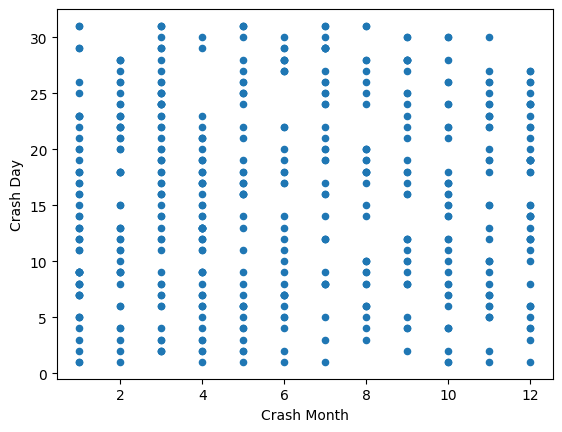

In [140]:
# statistical assertions
#Crash data is evenly distributed throughout the year
print(len(df))
import matplotlib.pyplot as plt
df.plot.scatter(x='Crash Month', y='Crash Day')
print(len(df))

2236
2236


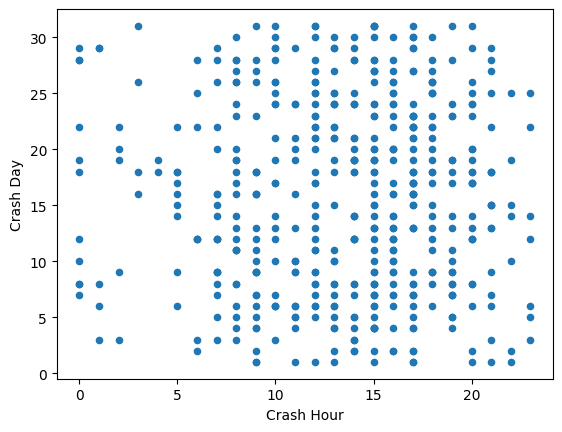

In [141]:
# statistical assertions
# Crashes are more during the middle of the day (office hours)
print(len(df))
data = df
data = data[df['Crash Hour'] <= 24]
data.plot.scatter(x='Crash Hour', y='Crash Day')
print(len(df))

In [142]:
crash_df = df[df['Record Type'] == 1]
vehicle_df = df[df['Record Type'] == 2]
participant_df = df[df['Record Type'] == 3]

crash_df.to_csv('crash_data.csv', index = False, header=True)
vehicle_df.to_csv('vehicle_data.csv', index = False, header=True)
participant_df.to_csv('participant_data.csv', index=False, header=True)